In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('datasets/EPL_20_21.csv')
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [4]:
df.dtypes

Name                      object
Club                      object
Nationality               object
Position                  object
Age                        int64
Matches                    int64
Starts                     int64
Mins                       int64
Goals                      int64
Assists                    int64
Passes_Attempted           int64
Perc_Passes_Completed    float64
Penalty_Goals              int64
Penalty_Attempted          int64
xG                       float64
xA                       float64
Yellow_Cards               int64
Red_Cards                  int64
dtype: object

In [5]:
df.shape

(532, 18)

In [6]:
df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [7]:
print(df.loc[:,"Matches"].max())

38


In [9]:
print(df.iloc[:,1])

0               Chelsea
1               Chelsea
2               Chelsea
3               Chelsea
4               Chelsea
             ...       
527    Sheffield United
528    Sheffield United
529    Sheffield United
530    Sheffield United
531    Sheffield United
Name: Club, Length: 532, dtype: object


In [10]:
print(df.iloc[:,16])

0      2
1      2
2      2
3      3
4      3
      ..
527    0
528    0
529    0
530    0
531    0
Name: Yellow_Cards, Length: 532, dtype: int64


In [11]:
print(df.iloc[2,:])

Name                     Timo Werner
Club                         Chelsea
Nationality                      GER
Position                          FW
Age                               24
Matches                           35
Starts                            29
Mins                            2602
Goals                              6
Assists                            8
Passes_Attempted                 826
Perc_Passes_Completed           77.2
Penalty_Goals                      0
Penalty_Attempted                  0
xG                              0.41
xA                              0.21
Yellow_Cards                       2
Red_Cards                          0
Name: 2, dtype: object


In [20]:
variable=pd.pivot_table(df,
              index='Club',
              values='Goals',
              columns='Position',
              aggfunc='sum',
               fill_value=0,
              margins='True',
              margins_name='Total'
              )
variable

Position,DF,"DF,FW","DF,MF",FW,"FW,DF","FW,MF",GK,MF,"MF,DF","MF,FW",Total
Club,,,,,,,,,,,
Arsenal,5,0,0,37,5,1,0,2,1,2,53
Aston Villa,5,0,0,33,0,7,0,7,0,0,52
Brighton,11,0,0,8,0,13,0,1,4,2,39
Burnley,5,0,0,18,0,1,0,8,0,0,32
Chelsea,15,0,0,16,2,6,0,7,0,10,56
Crystal Palace,4,0,0,24,0,1,0,9,0,1,39
Everton,6,0,0,23,1,6,0,8,0,1,45
Fulham,3,1,0,3,0,10,0,2,5,2,26
Leeds United,4,0,9,17,0,0,0,19,0,11,60


In [24]:
pd.pivot_table(df,
              index='Club',
              values=['Yellow_Cards'],
              columns='Position',
              aggfunc='sum',
              fill_value=0,
               margins=True,
               margins_name="Total"
              )

Yellow_Cards                                        \
Position                          DF DF,FW DF,MF   FW FW,DF FW,MF  GK   MF   
Club                                                                         
Arsenal                           22     0     0    6     1     0   0   13   
Aston Villa                       29     0     0    7     0     6   1   28   
Brighton                          21     0     5    0     0     6   3    8   
Burnley                           20     0     1    5     0     3   1   18   
Chelsea                           23     0     0    3     0     5   3   13   
Crystal Palace                    19     0     0    9     0     4   2   22   
Everton                           21     1     0    8     0     4   2   20   
Fulham                            23     2     0    3     1     7   2   19   
Leeds United                      19     0    11    3     0     0   0   22   
Leicester City                    33     2     0    2     0     0   0   12   
Liverpool FC                      13     0     6    7     0     0   1    8   
Manchester City                   17     0     0    6     0     1   3   14   
Manchester United                 28     0     0   13     0     0   3   16   
Newcastle United                  26     0     5    3     0     5   3   12   
Sheffield United                  28     0     8    6     0     7   1   22   
Southampton                       21     0     0    2     0     2   2   22   
Tottenham Hotspur                 18     0     0    4     0    10   0   25   
West Bromwich Albion              19     0     0    4     0     1   1   22   
West Ham United                   21     4     0    3     0     6   2   10   
Wolverhampton Wanderers           22     0     0    6     0     5   1   13   
Total                            443     9    36  100     2    72  31  339   

                                           
Position                MF,DF MF,FW Total  
Club                                       
Arsenal                     7     0    49  
Aston Villa                 0     0    71  
Brighton                    5     1    49  
Burnley                     0     0    48  
Chelsea                     0     4    51  
Crystal Palace              0     0    56  
Everton                     1     2    59  
Fulham                      7     3    67  
Leeds United                0     6    61  
Leicester City              6     6    61  
Liverpool FC                3     2    40  
Manchester City             0     5    46  
Manchester United           0     4    64  
Newcastle United            8     3    65  
Sheffield United            1     0    73  
Southampton                 0     3    52  
Tottenham Hotspur           0     0    57  
West Bromwich Albion        0     4    51  
West Ham United             0     4    50  
Wolverhampton Wanderers     4     4    55  
Total                      42    51  1125

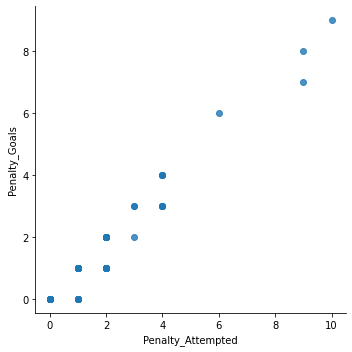

In [28]:
sns.lmplot(x='Penalty_Attempted', y='Penalty_Goals', data=df,
          fit_reg=False)
plt.show()

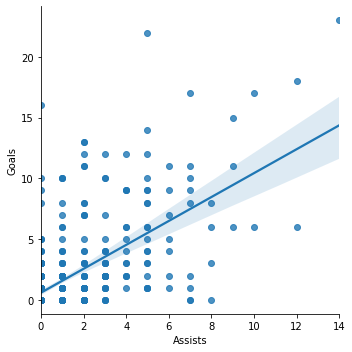

In [30]:
sns.lmplot(x='Assists', y='Goals', data=df)
plt.show()

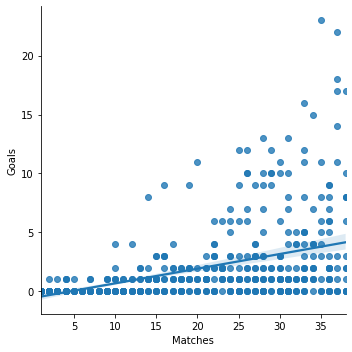

In [40]:
sns.lmplot(x='Matches', y='Goals', data=df,
          #fit_reg=False
          )
plt.show()

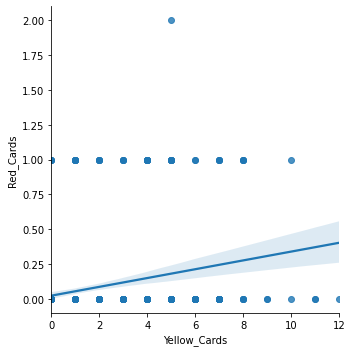

In [44]:
sns.lmplot(x='Yellow_Cards', y='Red_Cards', data=df,)
plt.show()

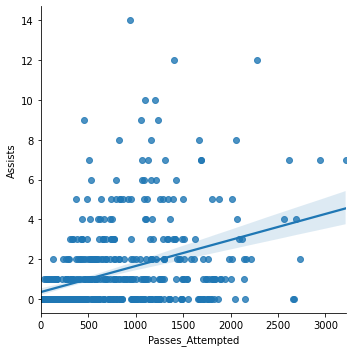

In [50]:
sns.lmplot(x='Passes_Attempted', y='Assists', data=df)
plt.show()

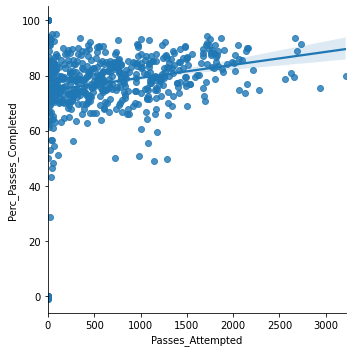

In [51]:
sns.lmplot(x='Passes_Attempted', y='Perc_Passes_Completed', data=df)
plt.show()

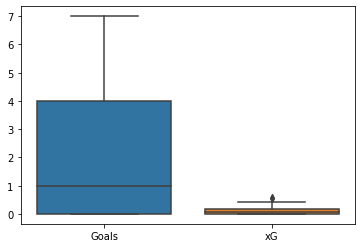

In [31]:
sns.boxplot(data=df.loc[df['Club'] == 'Chelsea', ['Goals', 'xG']])
plt.show()

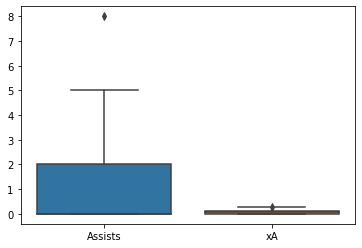

In [32]:
sns.boxplot(data=df.loc[df['Club'] == 'Chelsea', ['Assists', 'xA']])
plt.show()

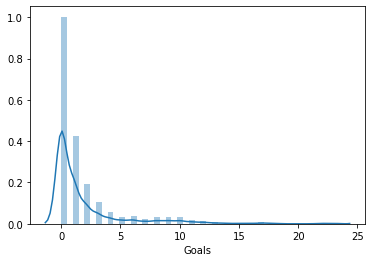

In [34]:
sns.distplot(df.Goals)
plt.show()

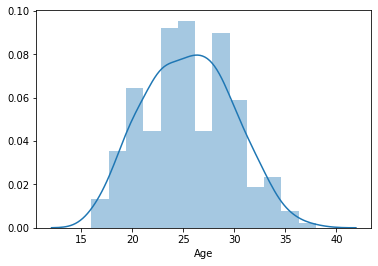

In [35]:
sns.distplot(df.Age)

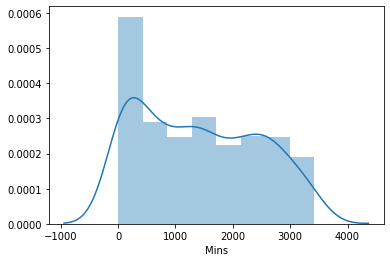

In [36]:
sns.distplot(df.Mins)

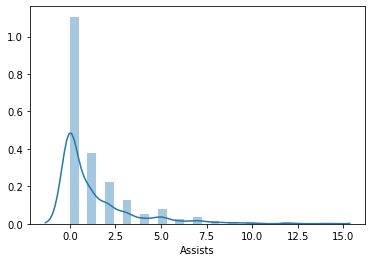

In [37]:
sns.distplot(df.Assists)